1. Identify 12 articles on Wikipedia that can be thematically arranged in 4 groups. Develop a dataset containing the content from the respective Wikipedia pages. (5 pts.)
<p>
2. Perform elbow analysis on the TFIDF vectorized dataset. Assess whether the elbow analysis aligns with the expected number of groups. (5 pts.)
<p>
3. Develop a KMeans clustering solution using the expected number of groups as k. Does KMeans model assign the expected cluster memberships to the documents? (5 pts.)
<p>
4. Develop a hierachical clustering solution. Does the hiearchical clustering analysis align with the expected results? (5 pts.) 
<p>
Please use text cells for comments on the solutions.
<p>
Please note that a 15% deduction will be applied for any errors or extraneous code in the submissions.
<p>
Submit LastnameFirstname-A2.ipynb

1. Identify 12 articles on Wikipedia that can be thematically arranged in 4 groups. Develop a dataset containing the context from the respective Wikipedia pages.

In [ ]:
!pip install wikipedia

  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11696 sha256=3c920fab0f7804842be03a490b19ed2683aef8535a6acd81b6b4e0253dbfcbfe
  Stored in directory: /root/.cache/pip/wheels/15/93/6d/5b2c68b8a64c7a7a04947b4ed6d89fb557dcc6bc27d1d7f3ba
Successfully built wikipedia


In [ ]:
import wikipedia

articles=['Real estate agent', 'mortgage', 'FSBO',
          'exercise', 'ketogenic diet', 'gym',
          'apple inc', 'microsoft', 'sony',
          'rock music', 'hip hop', 'blues']

wiki_lst=[]

for topic in articles:
  print("retrieving: ", topic)
  wiki_lst.append(wikipedia.page(topic).content)

retrieving:  Real estate agent
retrieving:  mortgage
retrieving:  FSBO
retrieving:  exercise
retrieving:  ketogenic diet
retrieving:  gym
retrieving:  apple inc
retrieving:  microsoft
retrieving:  sony
retrieving:  rock music
retrieving:  hip hop
retrieving:  blues


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words={'english'})
X = vectorizer.fit_transform(wiki_lst)

2. Perform elbow analysis on the TFDIF vectorized dataset. Assess whether the elbow analysis aligns with the expected number of groups.

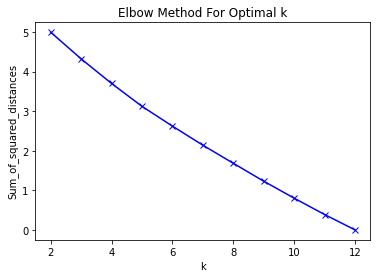

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(2,13)
for k in K:
  km = KMeans(n_clusters=k, max_iter=200, n_init=10)
  km = km.fit(X)
  Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

**Based on the elbow method analysis above, there is no clear alignment with expected number of groups because of the lack of "elbow". The results fail to show a clear dramatic change in reduction of sum of square distance for every additional cluster. This clear dramatic change would have shown the optimal cluster group assignment for the model. The expectation was to have this clear indication at k=4 but the model does not reflect this assumption.**

3. Develop a KMeans clustering solution using the expected number of groups as k. Does KMeans model assign the expected number of cluster memberships to the documents?

In [ ]:
import pandas as pd

true_k = 4
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)

labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(articles,labels)), columns=['topic', 'cluster'])
print(wiki_cl.sort_values(by=['cluster']))

                topic  cluster
8                sony        0
0   Real estate agent        1
1            mortgage        1
2                FSBO        1
4      ketogenic diet        1
9          rock music        1
10            hip hop        1
11              blues        1
3            exercise        2
5                 gym        2
6           apple inc        3
7           microsoft        3


**Based on lingustic representation of the articles, the KMeans model does not assign the anticipated cluster memberships. The initial expectation was to have 3 specific topics per cluster group which do not reflect in the results- more than 3 topics are in cluster group #2, only 2 topics in groups 3 & 4 and one topic is in a group of its own.**

4. Develop a hierarchical clustering solution. Does the hierarchical clustering analysis align with the expected results?

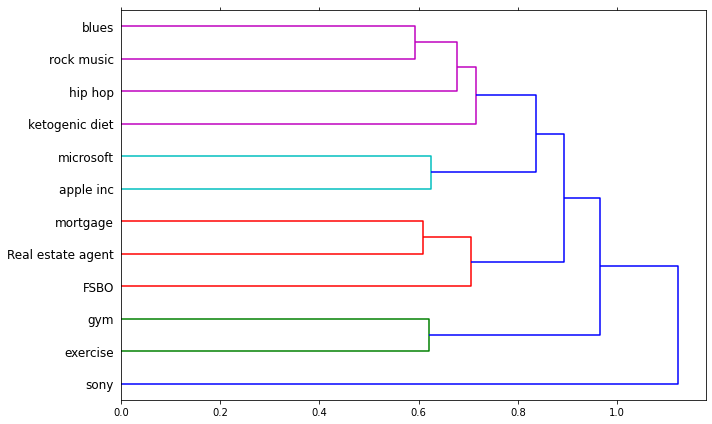

In [ ]:
from scipy.cluster.hierarchy import ward, dendrogram
from sklearn.metrics.pairwise import cosine_similarity

dist = 1 - cosine_similarity(X)

linkage_matrix = ward(dist)

fig, ax = plt.subplots(figsize=(10, 6))
ax = dendrogram(linkage_matrix, orientation='right', labels=articles);

plt.tick_params(\
    axis= 'x',
    which= 'both',
    bottom= 'off',
    top= 'off',
    labelbottom= 'off')

plt.tight_layout()

**The hierarchical clustering analysis did not produce the expected results because of the incorrect associations between some topics. As an example, results show that the ketogenic diet is somehow much more closely related, from a lingustic standpoint, to the cluster group of hip hop and blues & rock music compared to the anticipated association of gym and/or exercise.**